##Analyzing Instagram fake spammer genuine accounts

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv("train.csv")

In [8]:
train.shape #The answer is in the form of tuple because tuples are immutable and we don't want that someone else
            #change the shape of the data.

(576, 12)

In [9]:
train.head()  #First 5 rows
              #train.tail() Last 5 rows

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [10]:
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


####Q1 Determine the maximum no. of followers possessed by a user belonging to the group of users with no profile picture.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


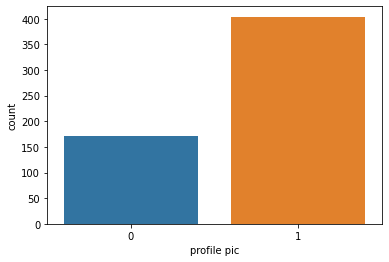

In [11]:
#Analyzing how many are having profile pic or not
sns.countplot("profile pic", data=train) 

In [23]:
#using max function to find out the max followers of the person having no profile pic
train[train["profile pic"]==0]['#followers'].max() 

3033

####Q2. Dead accounts are characterized by a lack of substantial activity on the platform, primarily concerning the accounts with no profile picture, empty bio and 0 posts. Determine the number of dead accounts, if they exist.

In [15]:
DeadAccounts=train[ (train['profile pic']==0) & (train['#posts']==0)  & (train['description length']==0)]

In [16]:
DeadAccounts.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,123.0,123.000000,123.000000,123.000000,123.000000,123.0,123.0,123.000000,123.0,123.000000,123.000000,123.0
mean,0.0,0.270407,1.170732,0.043089,0.065041,0.0,0.0,0.284553,0.0,106.804878,212.707317,1.0
std,0.0,0.220415,0.538780,0.116999,0.247606,0.0,0.0,0.453047,0.0,432.620506,723.321514,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0
25%,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,10.000000,11.000000,1.0
50%,0.0,0.270000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,27.000000,40.000000,1.0
75%,0.0,0.425000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,49.500000,112.500000,1.0
max,0.0,0.890000,3.000000,0.500000,1.000000,0.0,0.0,1.000000,0.0,3033.000000,7272.000000,1.0


In [19]:
DeadAccounts.count()

profile pic             123
nums/length username    123
fullname words          123
nums/length fullname    123
name==username          123
description length      123
external URL            123
private                 123
#posts                  123
#followers              123
#follows                123
fake                    123
dtype: int64

####Q3. Find out how expressive a person is on Instagram based on the length of their bio. (Hint: An expressive person can be defined as the user whose description_length exceeds the average.)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


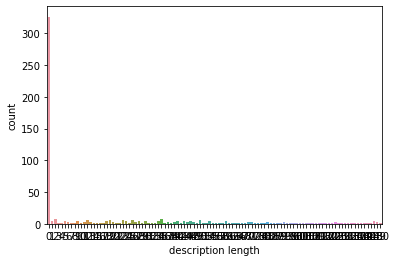

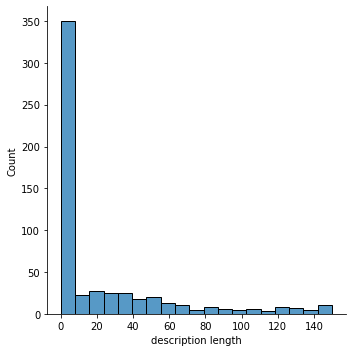

In [35]:
sns.countplot("description length", data=train) 
sns.displot(train["description length"])

In [24]:
train['description length'].describe()

count    576.000000
mean      22.623264
std       37.702987
min        0.000000
25%        0.000000
50%        0.000000
75%       34.000000
max      150.000000
Name: description length, dtype: float64

In [27]:
train['expressiveornot']=0
for i in range(0,576):
  if (train['description length'][i]>train['description length'].mean()):
    train['expressiveornot'][i]='yes'
  else:
    train['expressiveornot'][i]='no'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,expressiveornot
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,yes
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,yes
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,no
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,yes
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,no


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


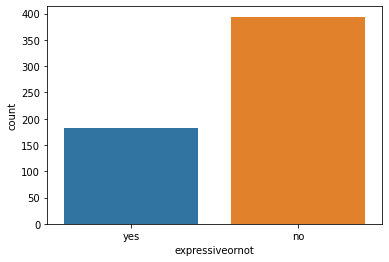

In [29]:
sns.countplot('expressiveornot', data=train)

In [30]:
train['expressiveornot'].value_counts()

no     394
yes    182
Name: expressiveornot, dtype: int64

####Q4. Determine the maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


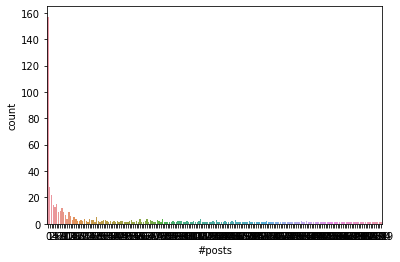

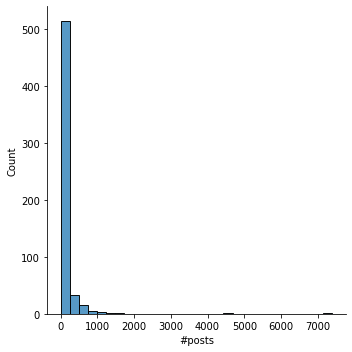

In [48]:
sns.countplot("#posts", data=train) 
sns.displot(train["#posts"],bins=30)

In [38]:
train[train["#posts"]==0]['#followers'].max()

3033

####Q5. Fake accounts have been witnessed to heavily skew the follower and following numbers.What is the ratio of number of followers (#followers) to number of following     (#follows) for the user with the maximum number of following?

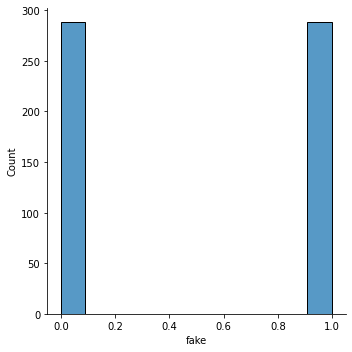

In [55]:
sns.displot(train["fake"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


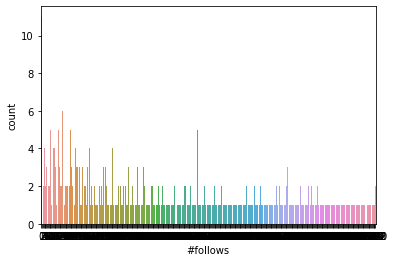

In [61]:
sns.countplot(train["#follows"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


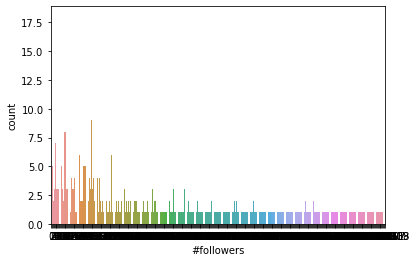

In [62]:
sns.countplot(train["#followers"])

In [51]:
followers=0
follows=0
for i in range(len(train[['#followers', '#follows', 'fake']])):
  if((train[['#followers', '#follows', 'fake']]['#followers'][i]-train[['#followers', '#follows', 'fake']]['fake'][i])>followers):
    followers=train[['#followers', '#follows', 'fake']]['#followers'][i]-train[['#followers', '#follows', 'fake']]['fake'][i]
    follows=train[['#followers', '#follows', 'fake']]['#follows'][i]

print(followers)
print(follows)
ratio=followers/follows
print(ratio)


15338538
61
251451.44262295082
